# Hypothesis Testing
In this file, we will perform **statistical analysis** for the ASUU Strike Effect Analysis Project. The statistical analysis performed will be based on the result of the **exploratory data analysis**.

In [130]:
from scipy.stats import f_oneway, kruskal, ttest_ind
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import utils                                                                   

In [131]:
# all data here include predicted course units

# complete info
df = pd.read_csv("../data/data_with_predicted_course_units.csv")

# contains students with no cgpa before or after 
df_invalid_cgpa = pd.read_csv("../data/incomplete_cgpa_only.csv")

# only contains students with complete cgpa information
df_valid_cgpa = pd.read_csv("../data/valid_cgpa_only.csv")

In [132]:
df_valid_cgpa.head()

,school,level,age,gender,relationship,faculty,department,strike_effect,challenge,work,skills,prep_before,prep_after,lecture,academic_act,courses_taken,course_unit,cgpa_before,cgpa_after,cgpa_change
0,university of lagos,400 Level,22,Male,Single,Engineering,Chemical engineering,I learned how to study better and my grades al...,Trying to remember things we were taught befor...,Worked in a role relevant to my studies,Acquired skills unrelated to course of study,Poorly,Poorly,No noticeable change,Rarely: I engaged in academic activities once ...,10,23,3.39,3.51,0.12
1,university of lagos,400 Level,23,Female,Single,Engineering,Chemical engineering,It affected it in a negative way as it became ...,"Rekindling the student in me, lol. Trying to g...",Did not work during the strike,Acquired skills unrelated to course of study,Poorly,Moderately,No noticeable change,Rarely: I engaged in academic activities once ...,10,23,4.44,4.50,0.06
2,university of lagos,400 Level,21,Male,Dating,Engineering,Chemical engineering,It has actually helped me a bit. The extended ...,Readapting to school,Worked in a role unrelated to my studies,"Volunteered for an event or organization, Acqu...",Moderately,Moderately,Fewer lecturers attended classes,Rarely: I engaged in academic activities once ...,10,23,3.54,3.61,0.07
3,university of lagos,400 Level,29,Male,Dating,Social Sciences,Political science,Good,Reading,Worked in a role unrelated to my studies,Acquired skills unrelated to course of study,Moderately,Very,No noticeable change,Rarely: I engaged in academic activities once ...,7,12,3.86,3.96,0.10
4,university of lagos,300 Level,24,Male,Single,Education,Educational foundations,Reluctance to concentrate on my studies,Getting to dust my books and and assimilate,Did not work during the strike,None of the above,Poorly,Very,Worse lectures after the strike,Never: I did not engage in any academic activi...,9,18,2.85,2.00,-0.85


In [133]:
df_valid_cgpa = df_valid_cgpa[~((df_valid_cgpa['level']=='600 Level') | (df_valid_cgpa['level']=='Masters Program') | (df_valid_cgpa['level']=='Postgraduate Diploma') | (df_valid_cgpa['level']=='100 Level'))]
df_valid_cgpa.level.unique()                                                                  

array(['400 Level', '300 Level', '200 Level', '500 Level'], dtype=object)

In [134]:
df_valid_cgpa = df_valid_cgpa[~(df_valid_cgpa['cgpa_change']==3.2)]

# Academic Level                                                                           

Feature: Academic Level

Null Hypothesis: There is no difference in the average cgpa change across academic levels.

Alternative Hypothesis: The Average cgpa change varies across academic levels.

Test Type: Two Tailed Test

Statistical Test: One Way ANOVA Test

Significance Level: 0.05

ANOVA Test Assumptions:
1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

Confirming Assumptions 

In [135]:
academic_level_std = df_valid_cgpa.groupby('level')['cgpa_change'].std().sort_values(ascending=False)
academic_level_std                                                                                

level
200 Level    0.389857
300 Level    0.387511
400 Level    0.350245
500 Level    0.295223
Name: cgpa_change, dtype: float64

The homogeneity of varience assumption gives a common rule of thumb that the ratio of the largest to the smallest standard deviation should not exceed 2:1. On this assumption, the academic level passes.

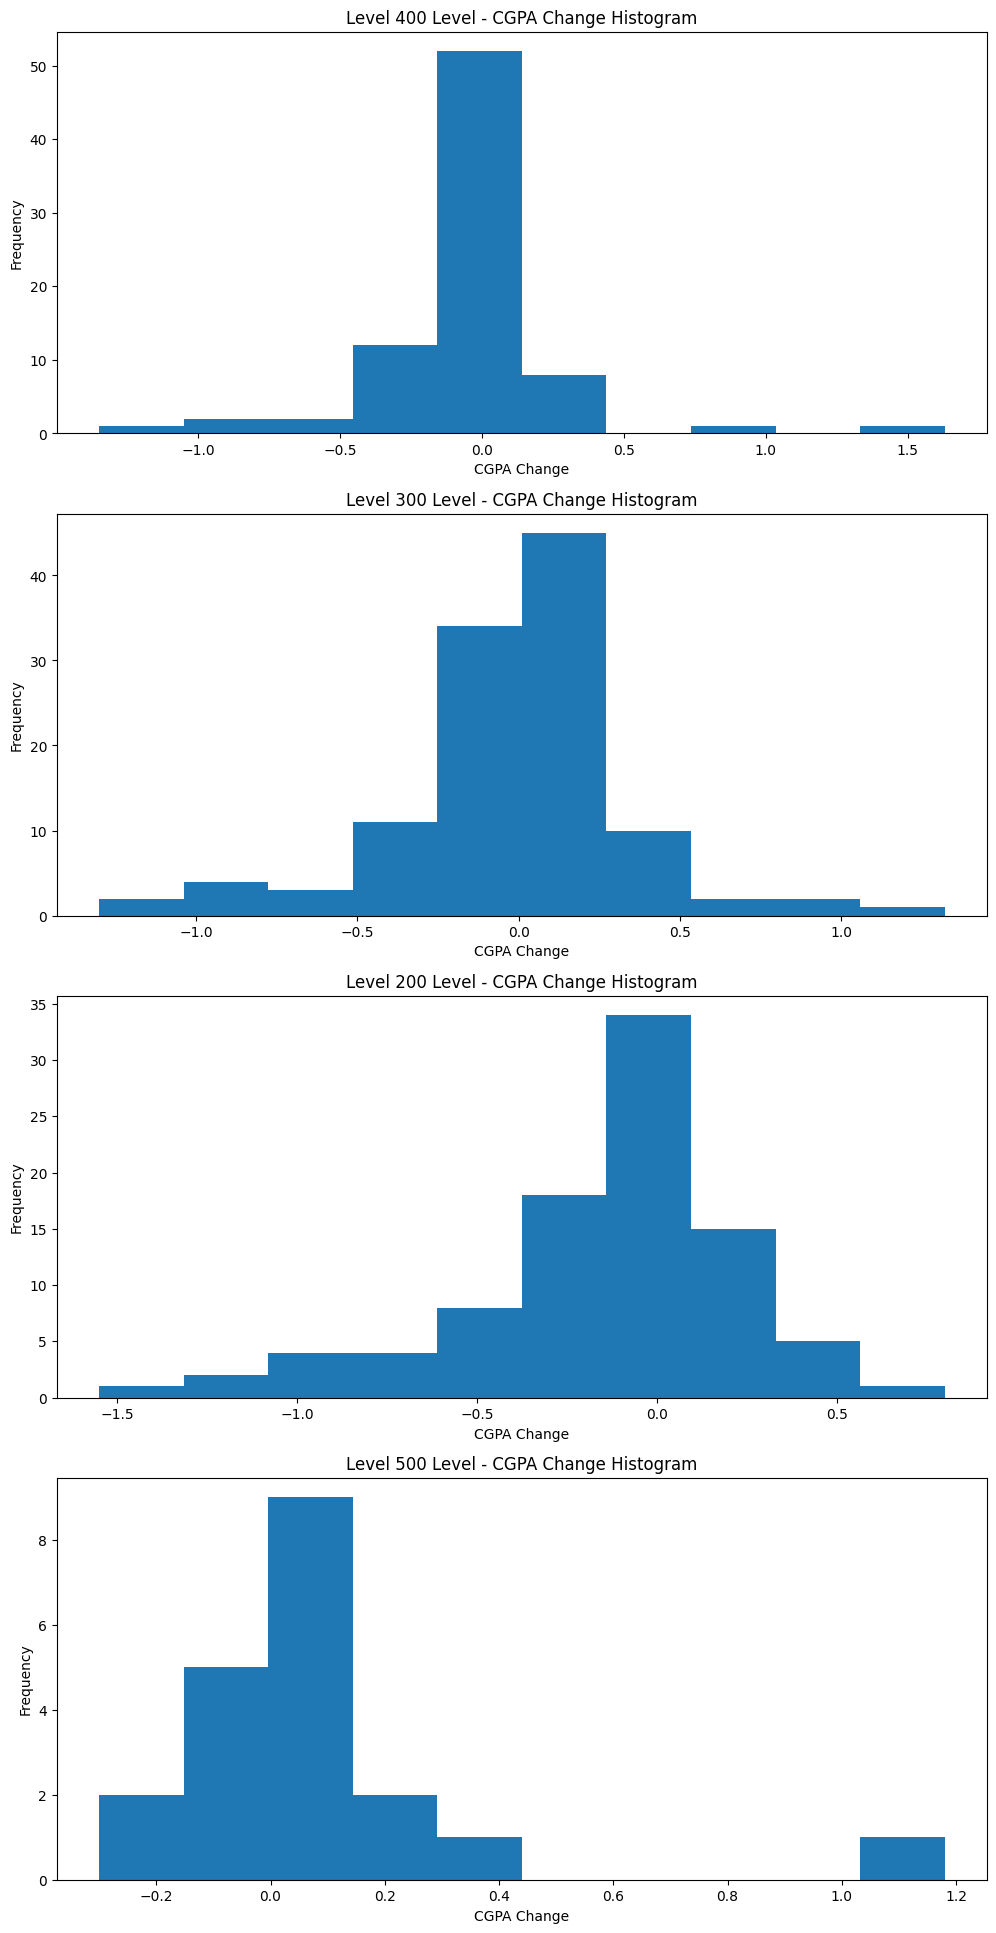

In [136]:
unique_levels = len(df_valid_cgpa.level.unique())
fig,axes = plt.subplots(unique_levels,figsize=(12,6*unique_levels))
for id, level in enumerate(df_valid_cgpa.level.unique()):
    ax = axes[id] if unique_levels > 1 else axes  
    df_level = df_valid_cgpa[df_valid_cgpa['level'] == level]
    df_level['cgpa_change'].plot(kind='hist', ax=ax)
    ax.set_title(f'Level {level} - CGPA Change Histogram')
    ax.set_xlabel('CGPA Change')
    ax.set_ylabel('Frequency')

The relevant categories are all normally distributed. This confirms the assumptions and we can go ahead with the Hypothesis Testing.

Hypothesis Testing on Academic Levels                                                                         

In [137]:
df_valid_cgpa.level.value_counts()

level
300 Level    114
200 Level     92
400 Level     79
500 Level     20
Name: count, dtype: int64

In [138]:
levels = {'level':['400 Level', '300 Level', '200 Level', '500 Level']}

for id,group in enumerate(df_valid_cgpa['level'].unique()):
    levels['level'][id]=df_valid_cgpa[df_valid_cgpa['level']==group]['cgpa_change']                                                                       

In [139]:
hyp_test = f_oneway(levels['level'][0],levels['level'][1],levels['level'][2],levels['level'][3])

print(hyp_test)

F_onewayResult(statistic=4.184646206134625, pvalue=0.0063650085729115265)


The p-value score of 0.0064 is less than the significance level of 0.05 this means that we reject the null hypothesis

**There is a significant difference between the average cgpa change across the different academic levels**                                                                     

# Faculty

Feature: Faculty

Null Hypothesis: There is no difference in the average cgpa change across Faculty.

Alternative Hypothesis: The Average cgpa change varies across Faculty.

Test Type: Two Tailed Test

Statistical Test: One Way ANOVA Test

Significance Level: 0.05

ANOVA Test Assumptions:
1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

Confirming Assumptions 

In [140]:
faculty_std = df_valid_cgpa.groupby('faculty')['cgpa_change'].std().sort_values(ascending=False)
faculty_std                                                                                

faculty
Law                       0.616323
Arts                      0.516523
Education                 0.478607
Sciences                  0.358150
Engineering               0.337233
Social Sciences           0.335433
Clinical Sciences         0.323045
Management Science        0.295992
Pharmacy                  0.141880
Basic Medical Sciences    0.133179
Environmental Sciences    0.116619
AGRICULTURE                    NaN
Dental Sciences                NaN
Physical sciences              NaN
Name: cgpa_change, dtype: float64

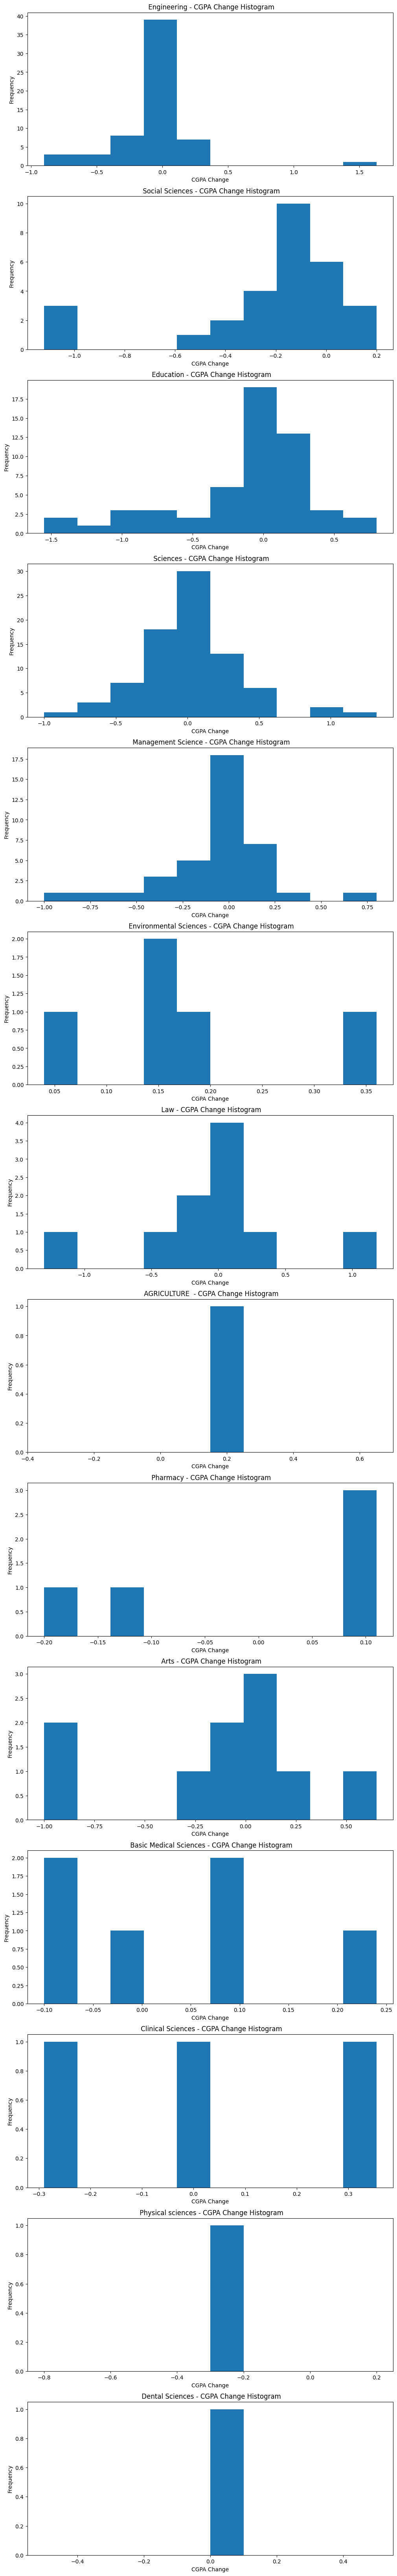

In [141]:
unique_levels = len(df_valid_cgpa.faculty.unique())
fig,axes = plt.subplots(unique_levels,figsize=(12,6*unique_levels))
for id, faculty in enumerate(df_valid_cgpa.faculty.unique()):
    ax = axes[id] if unique_levels > 1 else axes  
    df_level = df_valid_cgpa[df_valid_cgpa['faculty'] == faculty]
    df_level['cgpa_change'].plot(kind='hist', ax=ax)
    ax.set_title(f' {faculty} - CGPA Change Histogram')
    ax.set_xlabel('CGPA Change')
    ax.set_ylabel('Frequency')

This feature fails both the homoscandesity test and nornallity criteria. We cannot use the Anova test to test the Hypothesis. For Due to the lack of normallity among the groups, we have to use a non-parametric Test.

**We will use the Kruskal Willis Test.**

The kruskal willis test needs every group to contain more than 5 observations. So, I'll temporarily drop the groups that have less than 5 observations                                                        

In [142]:
faculty_counts = df_valid_cgpa['faculty'].value_counts()
less_than_five = faculty_counts.index[10:]
filtered_df = df_valid_cgpa[~(df_valid_cgpa['faculty'].isin(less_than_five))]
filtered_df.faculty.value_counts()


faculty
Sciences                  81
Engineering               61
Education                 54
Management Science        38
Social Sciences           29
Law                       10
Arts                      10
Basic Medical Sciences     6
Environmental Sciences     5
Pharmacy                   5
Name: count, dtype: int64

In [143]:
faculties = {'faculty':filtered_df.faculty.unique()}

for id,group in enumerate(filtered_df['faculty'].unique()):
    faculties['faculty'][id]=filtered_df[filtered_df['faculty']==group]['cgpa_change']

In [144]:
sample = [faculties['faculty'][id] for id in range(10)]
faculty_test = kruskal(sample[0], sample[1], sample[2], sample[3], sample[4], 
                       sample[5], sample[6], sample[7], sample[8], sample[9])
print(faculty_test)

KruskalResult(statistic=17.846018573361583, pvalue=0.03700261022840909)


The p-value score of 0.0321 is less than the significance level of 0.05 this means that we reject the null hypothesis

**There is a significant difference between the average cgpa change across the different faculties**

# Age

Feature: Age

Null Hypothesis: Students older than 21 were affected more by the strike (Higher Average CGPA change)

Alternative Hypothesis: Students younger 21 were affected less by the strike (Lower Average CGPA change)

Test Type: Right Tailed Test

Statistical Test: Two Sample T Test

Significance Level: 0.05

TTest Assumptions:
1. The samples are independent.
2. Homogeneity of Variance (Equal Variances)
3. For smaller sample sizes, the data should follow a normal distribution

Testing Assumptions

In [145]:
sample_one = df_valid_cgpa[df_valid_cgpa['age']>21]['cgpa_change']
sample_two = df_valid_cgpa[df_valid_cgpa['age']<=21]['cgpa_change']

In [146]:
df_valid_cgpa.age.value_counts()

age
21    84
22    65
20    45
23    35
24    20
25    19
26    11
19     8
27     6
28     5
29     3
30     2
37     1
32     1
Name: count, dtype: int64

In [147]:
print(f'sample_one_std: {np.std(sample_one)}')
print(f'sample_two_std: {np.std(sample_two)}')

sample_one_std: 0.35233405415072455
sample_two_std: 0.40885284483452927


<Axes: title={'center': 'cgpa distribution for students older than 20'}, ylabel='Frequency'>

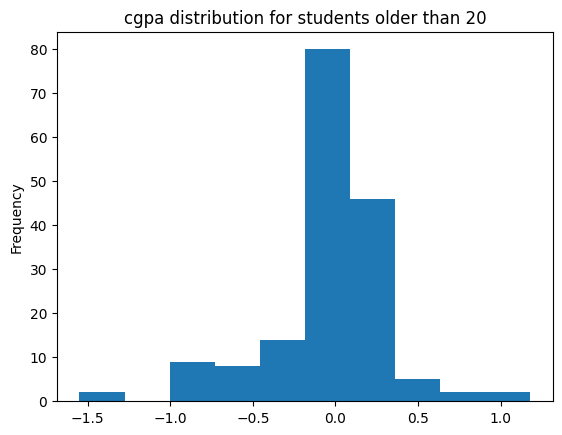

In [148]:
sample_one.plot(kind='hist',title='cgpa distribution for students older than 20')

<Axes: title={'center': 'cgpa distribution for students younger than 20'}, ylabel='Frequency'>

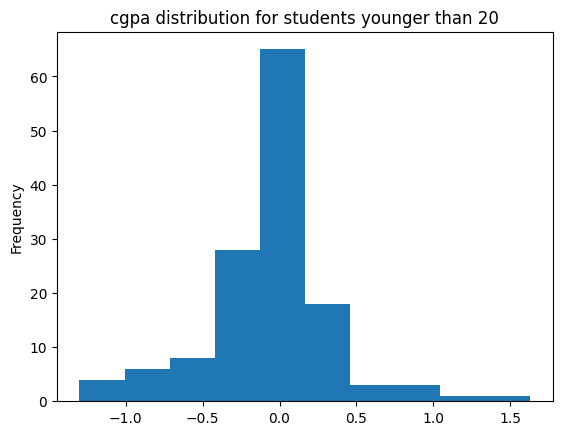

In [149]:
sample_two.plot(kind='hist',title='cgpa distribution for students younger than 20')

The age distribution passes all assumptions

In [150]:
age_test = ttest_ind(sample_one,sample_two) 
print(age_test)

TtestResult(statistic=0.37359324019837115, pvalue=0.7089682217418158, df=303.0)


The p-value score of 0.709 is greater than the significance level of 0.05 this means that we fail to reject the null hypothesis

**This suggests that students older than 21 were indeed affected more by the strike**

# Gender

Feature: Gender

Null Hypothesis: Females were less affected by the strike (lower Average CGPA change)

Alternative Hypothesis: Males were more affected by the strike (higher Average CGPA change)

Test Type: Right Tailed Test

Statistical Test: Two Sample T Test

Significance Level: 0.05

TTest Assumptions:
1. The samples are independent.
2. Homogeneity of Variance (Equal Variances)
3. For smaller sample sizes, the data should follow a normal distribution

Testing Assumptions

In [151]:
sample_one = df_valid_cgpa[df_valid_cgpa['gender']=='Male']['cgpa_change']
sample_two = df_valid_cgpa[df_valid_cgpa['gender']=='Female']['cgpa_change']

In [152]:
df_valid_cgpa.gender.value_counts()

gender
Male      161
Female    144
Name: count, dtype: int64

In [153]:
print(f'sample_one_std: {np.std(sample_one)}')
print(f'sample_two_std: {np.std(sample_two)}')

sample_one_std: 0.35194627695184916
sample_two_std: 0.4064857404811467


<Axes: title={'center': 'cgpa distribution for Males'}, ylabel='Frequency'>

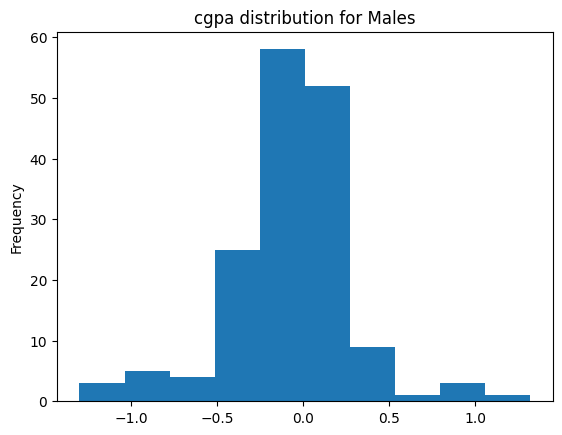

In [154]:
sample_one.plot(kind='hist',title='cgpa distribution for Males')

<Axes: title={'center': 'cgpa distribution for Females'}, ylabel='Frequency'>

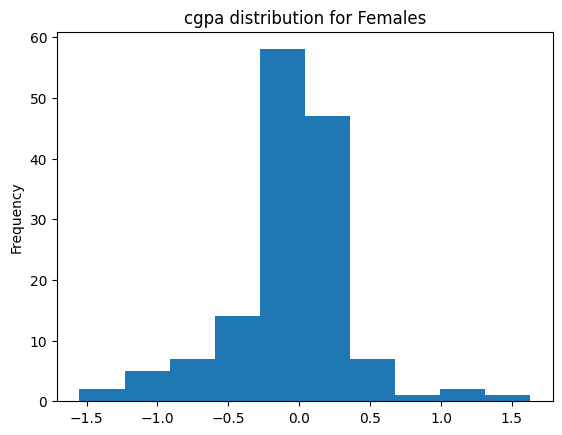

In [155]:
sample_two.plot(kind='hist',title='cgpa distribution for Females')

It passes all assumptions

In [156]:
gender_test = ttest_ind(sample_one,sample_two) 
print(gender_test)

TtestResult(statistic=-0.5322755379066479, pvalue=0.5949252552984392, df=303.0)


The p-value score of 0.595 is greater than the significance level of 0.05 this means that we fail to reject the null hypothesis

**This suggests that Females were indeed affected less by the strike**

# Relationship Status

Feature: Relationship Status

Null Hypothesis: There is no difference in the average cgpa change across Relationship status.

Alternative Hypothesis: The Average cgpa change varies across Relationship status.

Test Type: Two Tailed Test

Statistical Test: One Way ANOVA Test

Significance Level: 0.05

Test Assumptions:
1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

Testing Assumptions

In [161]:
df_valid_cgpa.relationship.value_counts()

relationship
Single         235
Dating          51
Complicated     14
Married          4
Talking          1
Name: count, dtype: int64

In [160]:
relationship_std = df_valid_cgpa.groupby('relationship')['cgpa_change'].std().sort_values(ascending=False)
relationship_std                                                                                

relationship
Dating         0.442576
Single         0.374820
Complicated    0.280897
Married        0.115866
Talking             NaN
Name: cgpa_change, dtype: float64

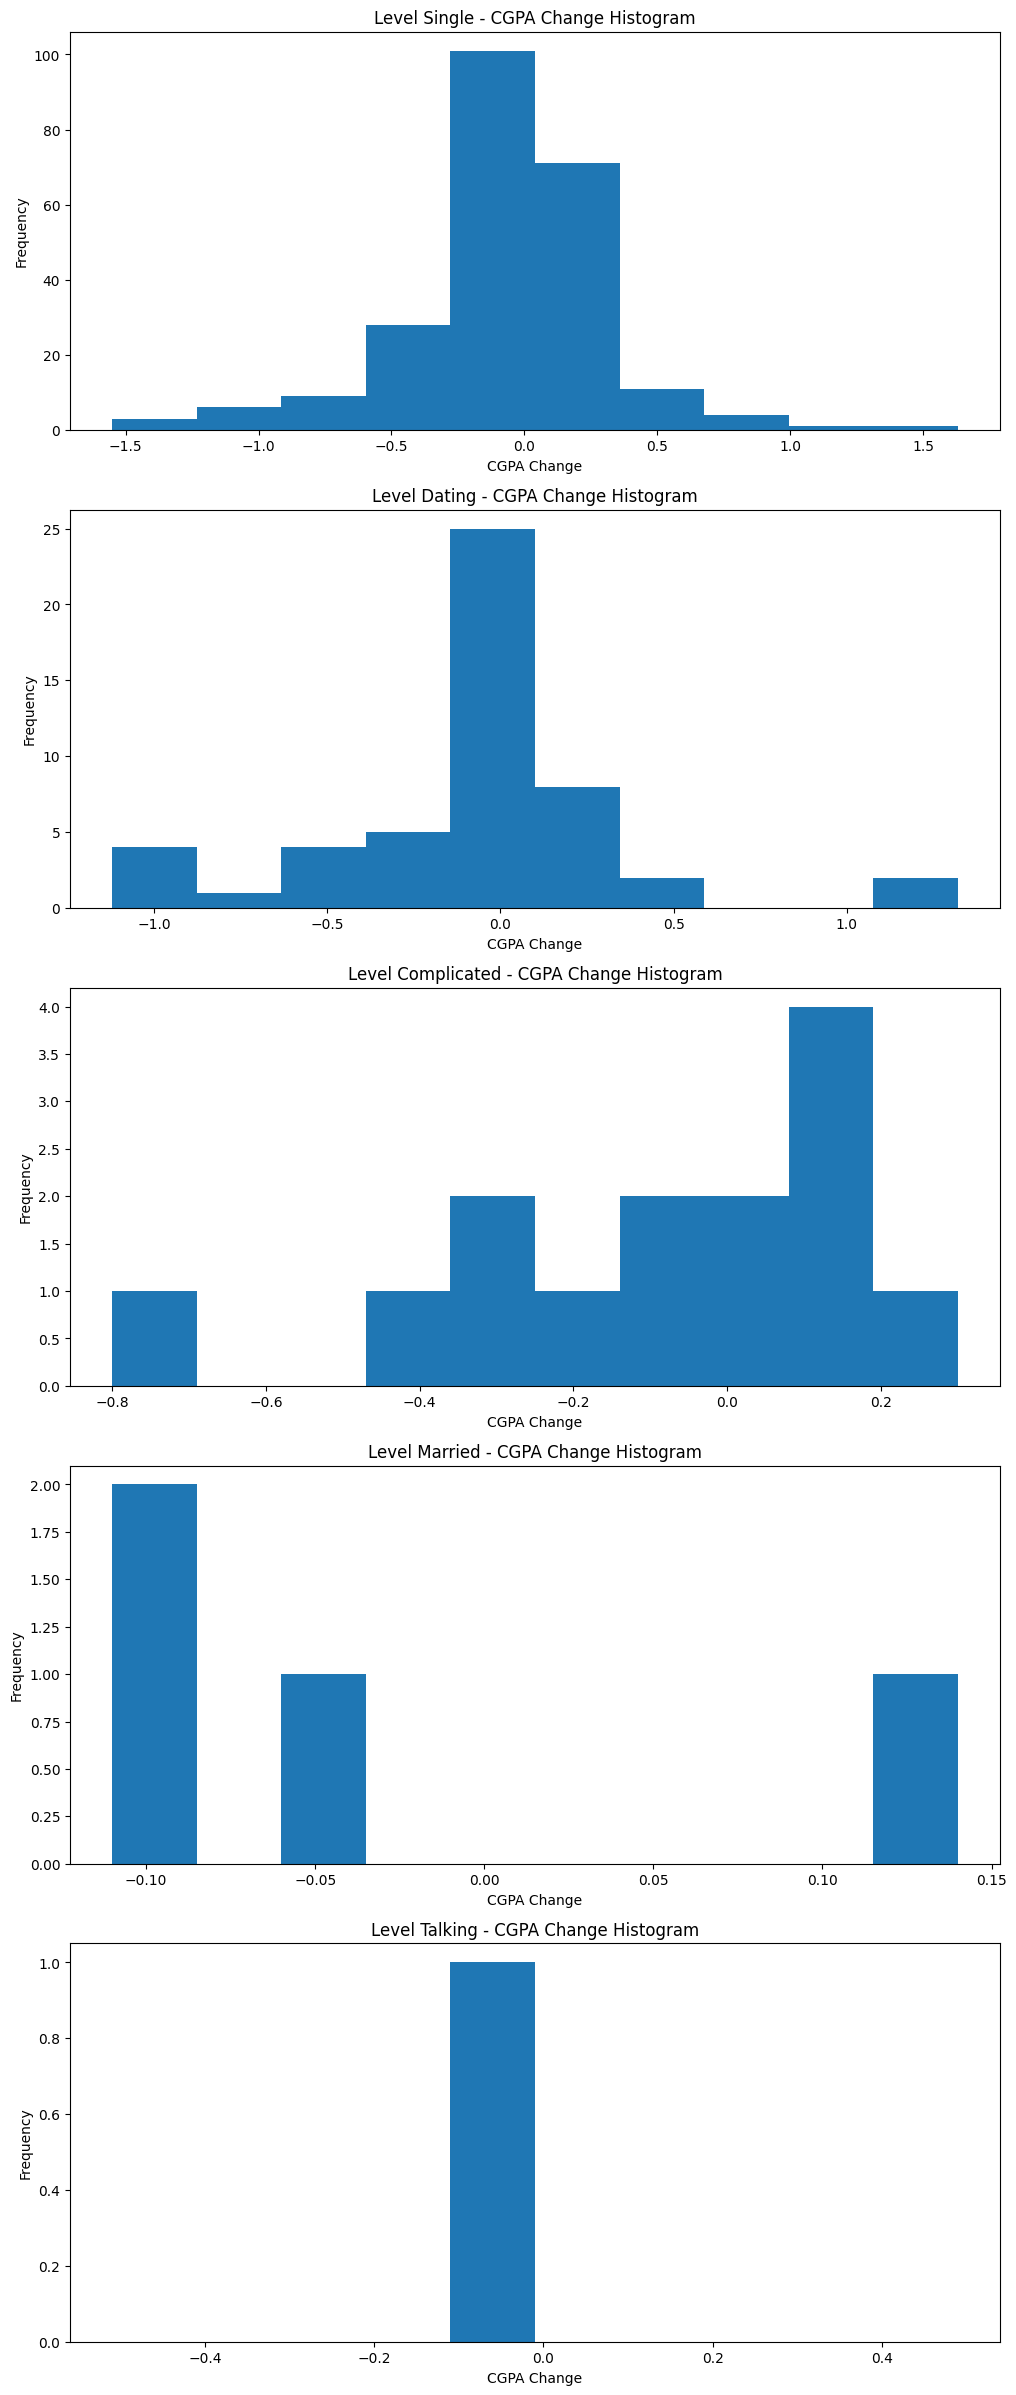

In [162]:
unique_statuses = len(df_valid_cgpa.relationship.unique())
fig,axes = plt.subplots(unique_statuses,figsize=(12,6*unique_statuses))
for id, relationship in enumerate(df_valid_cgpa.relationship.unique()):
    ax = axes[id] if unique_statuses > 1 else axes  
    df_level = df_valid_cgpa[df_valid_cgpa['relationship'] == relationship]
    df_level['cgpa_change'].plot(kind='hist', ax=ax)
    ax.set_title(f'Level {relationship} - CGPA Change Histogram')
    ax.set_xlabel('CGPA Change')
    ax.set_ylabel('Frequency')

The relationship status feature fails both assumption tests. 

We'll use the kruskal willis test.

The kruskal willis test needs every group to contain more than 5 observations. So, I'll temporarily drop the groups that have less than 5 observations                                                        

In [164]:
relationship_status_counts = df_valid_cgpa['relationship'].value_counts()
less_than_five = relationship_status_counts.index[3:]
filtered_df = df_valid_cgpa[~(df_valid_cgpa['relationship'].isin(less_than_five))]
filtered_df.relationship.value_counts()

relationship
Single         235
Dating          51
Complicated     14
Name: count, dtype: int64

In [165]:
relationship_status = {'relationship':filtered_df.relationship.unique()}

for id,group in enumerate(filtered_df['relationship'].unique()):
    relationship_status['relationship'][id]=filtered_df[filtered_df['relationship']==group]['cgpa_change']

In [166]:
sample = [faculties['faculty'][id] for id in range(3)]
faculty_test = kruskal(sample[0], sample[1], sample[2])
print(faculty_test)

KruskalResult(statistic=7.280849582893741, pvalue=0.026241194562764192)


The p-value score of 0.0262 is less than the significance level of 0.05 this means that we reject the null hypothesis

**There is a significant difference between the average cgpa change across the different relationship_statuses**

# Worked

Feature: worked

Null Hypothesis: Students who worked were affected more by the strike (Higher Average CGPA change)

Alternative Hypothesis: Students who didn't work were affected less by the strike (Lower Average CGPA change)

Test Type: Right Tailed Test

Statistical Test: Two Sample T Test

Significance Level: 0.05

TTest Assumptions:
1. The samples are independent.
2. Homogeneity of Variance (Equal Variances)
3. For smaller sample sizes, the data should follow a normal distribution

In [169]:
df_valid_cgpa.work.value_counts()

work
Worked in a role unrelated to my studies    194
Did not work during the strike               65
Worked in a role relevant to my studies      46
Name: count, dtype: int64

In [170]:
sample_one = df_valid_cgpa[(df_valid_cgpa['work']=='Worked in a role unrelated to my studies')|(df_valid_cgpa['work']=='Worked in a role relevant to my studies')]['cgpa_change']
sample_two = df_valid_cgpa[df_valid_cgpa['work']=='Did not work during the strike']['cgpa_change']

In [172]:
print(f'sample_one_std: {np.std(sample_one)}')
print(f'sample_two_std: {np.std(sample_two)}')

sample_one_std: 0.35016900619458813
sample_two_std: 0.4622928972418208


<Axes: title={'center': 'cgpa distribution for students that worked'}, ylabel='Frequency'>

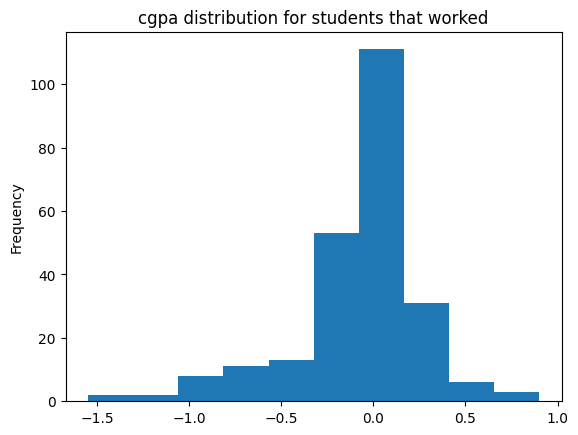

In [174]:
sample_one.plot(kind='hist',title='cgpa distribution for students that worked')

<Axes: title={'center': 'cgpa distribution for students that did not worked'}, ylabel='Frequency'>

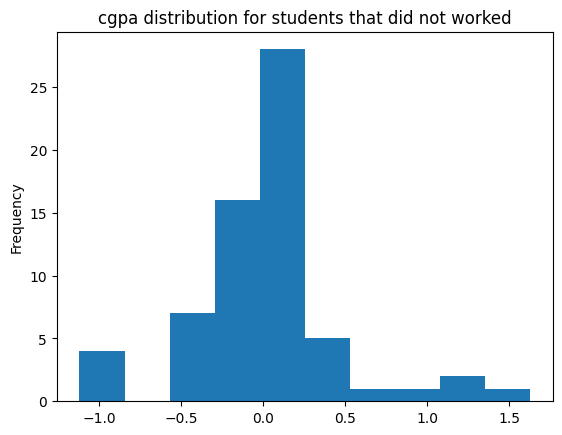

In [175]:
sample_two.plot(kind='hist',title='cgpa distribution for students that did not worked')

The work distribution passes all assumptions

In [176]:
age_test = ttest_ind(sample_one,sample_two) 
print(age_test)

TtestResult(statistic=-1.7872979377141847, pvalue=0.074888764100889, df=303.0)


The p-value score of 0.0749 is greater than the significance level of 0.05 this means that we fail to reject the null hypothesis

**This suggests that worked were indeed affected more by the strike**

# Academic Engagement

Feature: Academic Engagement

Null Hypothesis: Those Who Revisited Academics During The Strike Experienced Less CGPA Change

Alternative Hypothesis: Those Who Revisited Academics During The Strike did not Experience Less CGPA Change 

Test Type: Right Tailed Test

Statistical Test: Two Sample T Test

Significance Level: 0.05

TTest Assumptions:
1. The samples are independent.
2. Homogeneity of Variance (Equal Variances)
3. For smaller sample sizes, the data should follow a normal distribution

In [187]:
df_valid_cgpa.academic_act.unique()

array(['rarely', 'Never', 'often', 'sometimes', 'very_often'],
      dtype=object)

In [188]:
df_valid_cgpa.academic_act.replace({'Very often: I engaged in academic activities almost as often as I would during a normal semester.':'very_often',
                                   'Sometimes: I engaged in academic activities occasionally, but not on a regular basis during the strike.':'sometimes',
                                   'Often: I engaged in academic activities regularly, but not as often as I would during a normal semester.':'often',
                                   'Never: I did not engage in any academic activities during the strike.':'Never',
                                   'Rarely: I engaged in academic activities once or twice during the strike.':'rarely'},
                                   inplace=True)

df_valid_cgpa.academic_act.unique()

array(['rarely', 'Never', 'often', 'sometimes', 'very_often'],
      dtype=object)

In [ ]:
sample_one = df_valid_cgpa[(df_valid_cgpa['academic_act'])]